In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')

In [2]:
with open('data.pkl', 'rb') as handle:
    data = pickle.load(handle)

In [3]:
data.shape

(359424, 11)

In [4]:
(data.makespan_IPEFT<=data.makespan_prop).value_counts()

True     292101
False     67323
dtype: int64

In [5]:
data = data.astype('float64')
data['n'] = data['n'].astype('int32')
data.dtypes

b                 float64
ccr               float64
density           float64
fat               float64
jump              float64
makespan_HEFT     float64
makespan_IPEFT    float64
makespan_prop     float64
n                   int32
p                 float64
regularity        float64
dtype: object

In [6]:
data['improv_ipeft'] = (1 - data['makespan_IPEFT']/data['makespan_HEFT'])*100
data['improv_prop'] = (1 - data['makespan_prop']/data['makespan_HEFT'])*100

In [7]:
data.head(5)

,b,ccr,density,fat,jump,makespan_HEFT,makespan_IPEFT,makespan_prop,n,p,regularity,improv_ipeft,improv_prop
0,0.1,0.1,0.2,0.1,1.0,3385.0,3357.0,3479.0,100,4.0,0.2,0.827179,-2.776957
1,0.1,0.1,0.2,0.1,1.0,3394.0,3375.0,3489.0,100,4.0,0.2,0.559811,-2.799057
2,0.1,0.1,0.2,0.1,1.0,3396.0,3354.0,3501.0,100,8.0,0.2,1.236749,-3.091873
3,0.1,0.1,0.2,0.1,1.0,3384.0,3351.0,3500.0,100,8.0,0.2,0.975177,-3.427896
4,0.1,0.1,0.2,0.1,1.0,3383.0,3336.0,3478.0,100,16.0,0.2,1.389299,-2.808158


<Figure size 432x288 with 0 Axes>

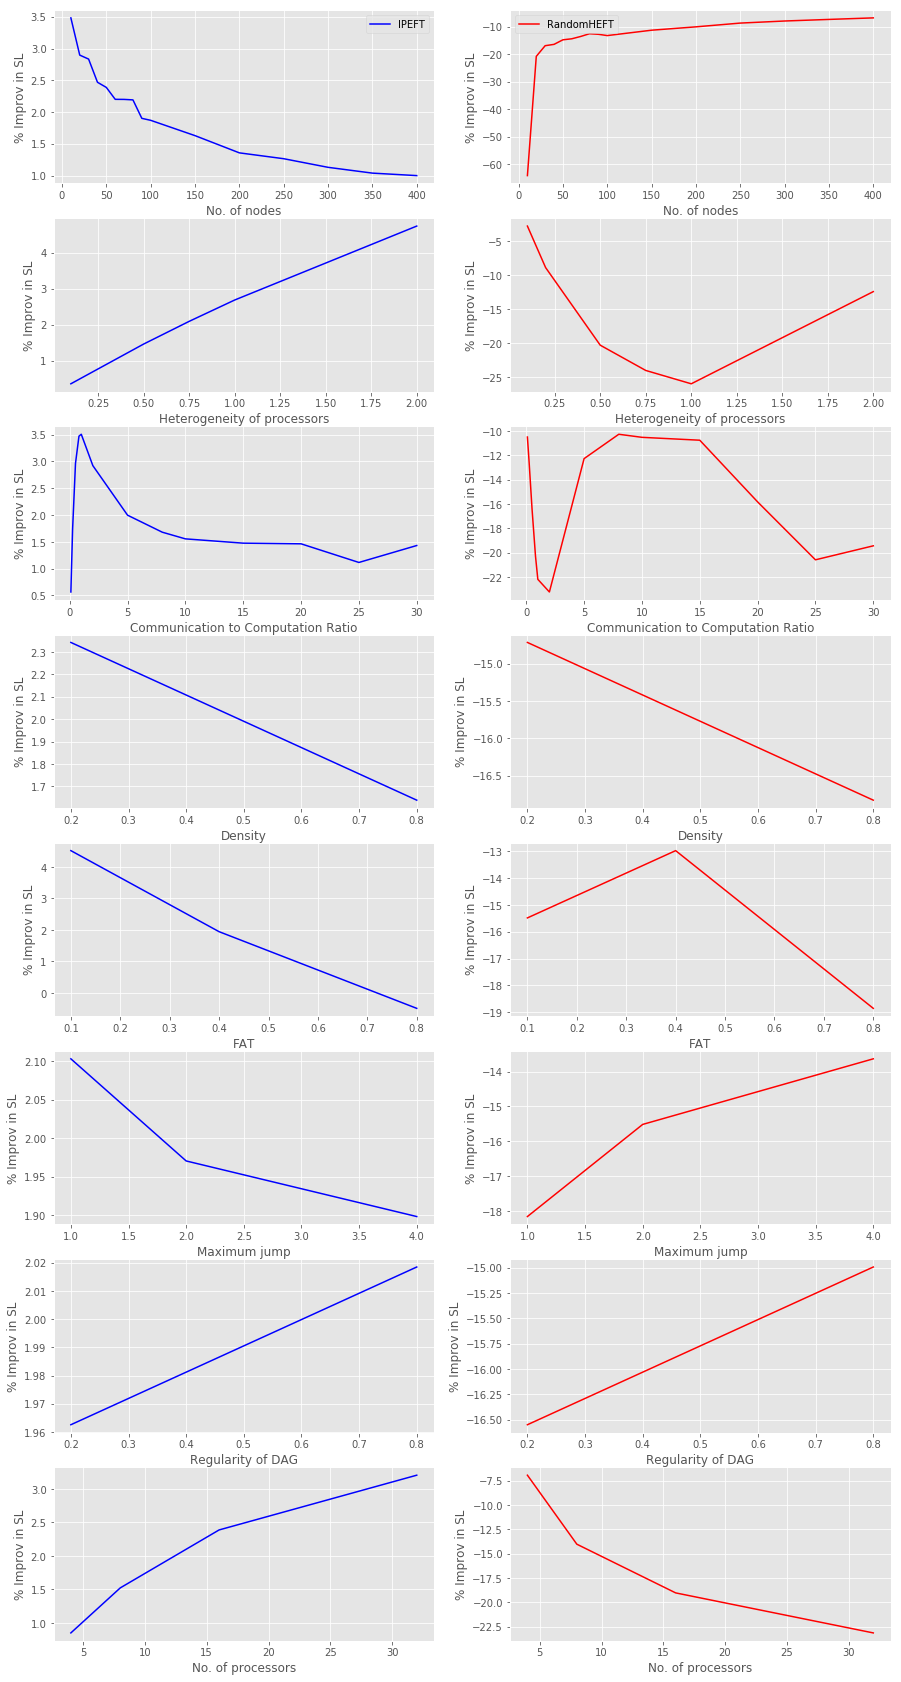

In [8]:
plt.subplots_adjust(wspace=5, hspace=10)

params = ['n','b','ccr','density','fat','jump', 'regularity', 'p']
x_labels = ['No. of nodes', 'Heterogeneity of processors', 'Communication to Computation Ratio',
            'Density', 'FAT', 'Maximum jump', 'Regularity of DAG', 'No. of processors']
_, axs = plt.subplots(len(params),2, figsize=(15,30))

for i in range(len(params)):
    g_mean = data.groupby([params[i]]).mean()
    
    x, y_ipeft, y_prop = zip(*sorted(zip(g_mean.index, g_mean['improv_ipeft'], g_mean['improv_prop'])))
    axs[i, 0].plot(x, y_ipeft, label='IPEFT', c='b')
    axs[i, 1].plot(x, y_prop, label='RandomHEFT', c='r')
    axs[i, 0].set(xlabel=x_labels[i], ylabel='% Improv in SL')
    axs[i, 1].set(xlabel=x_labels[i], ylabel='% Improv in SL')

axs[0,0].legend()
axs[0,1].legend()

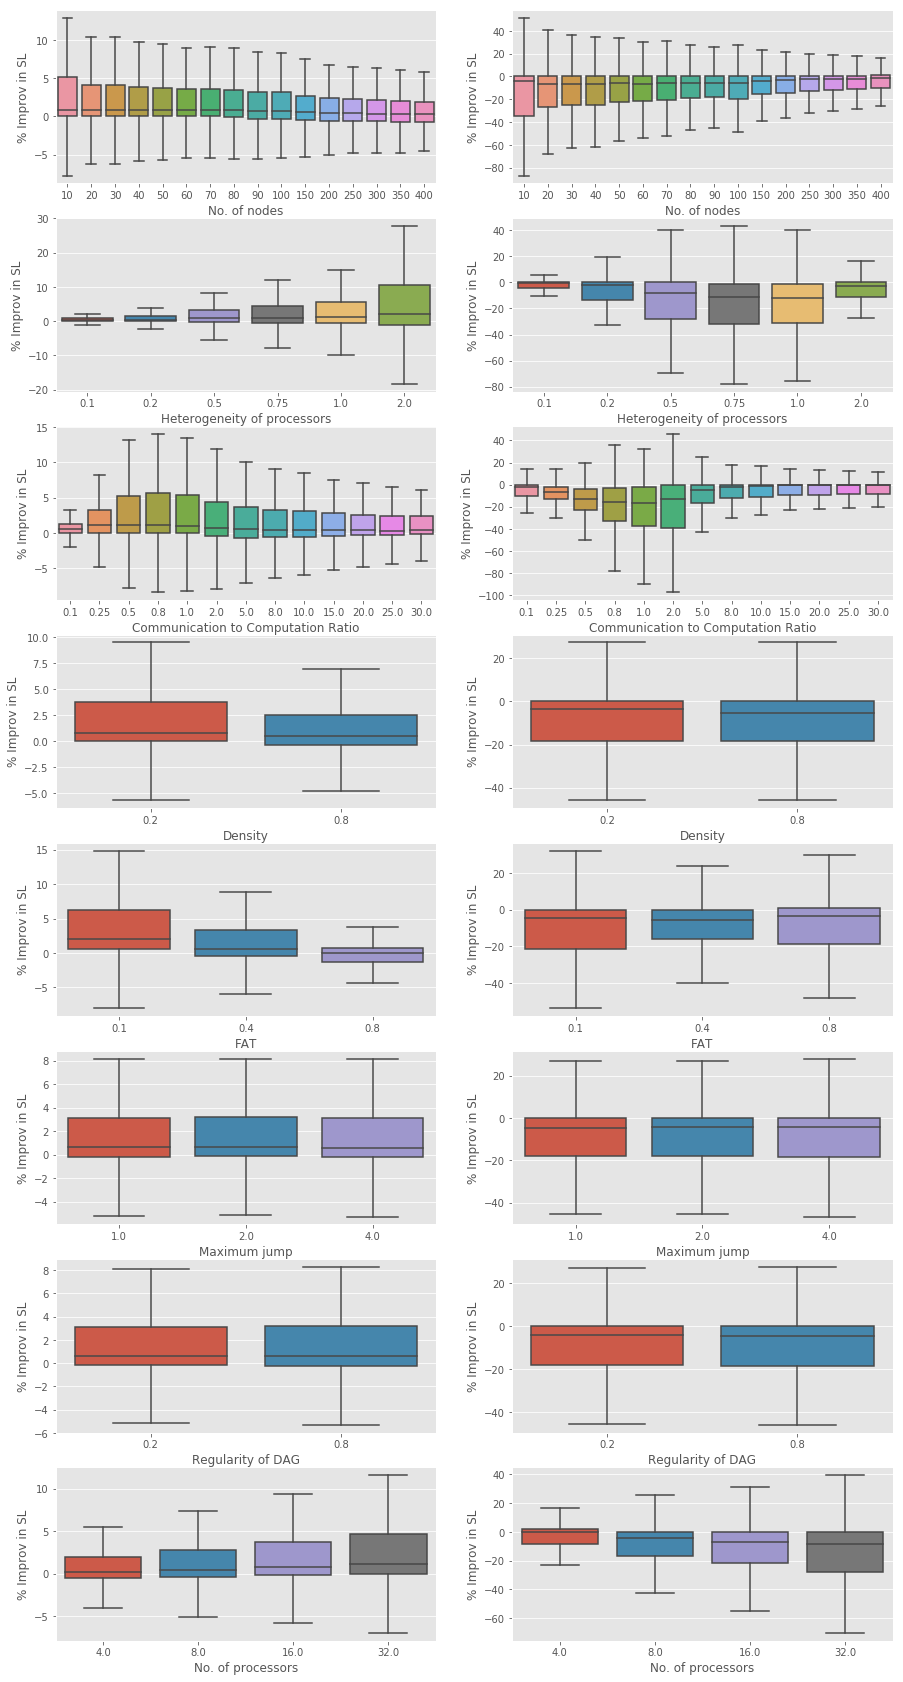

In [9]:
params = ['n','b','ccr','density','fat','jump', 'regularity', 'p']
x_labels = ['No. of nodes', 'Heterogeneity of processors', 'Communication to Computation Ratio',
            'Density', 'FAT', 'Maximum jump', 'Regularity of DAG', 'No. of processors']
_, axs = plt.subplots(len(params),2, figsize=(15,30))

for i in range(len(params)):
    sns.boxplot(x=params[i], y="improv_ipeft", data=data, showfliers=False, ax=axs[i, 0])
    sns.boxplot(x=params[i], y="improv_prop", data=data, showfliers=False, ax=axs[i, 1])
    axs[i, 0].set(xlabel=x_labels[i], ylabel='% Improv in SL')
    axs[i, 1].set(xlabel=x_labels[i], ylabel='% Improv in SL')
    
# plt.savefig('plot.png', dpi=300, format='png')

In [10]:
with open('time_data.pkl', 'rb') as handle:
    time = pickle.load(handle)
time = time.drop(['makespan_HEFT', 'makespan_IPEFT', 'makespan_prop'], axis=1)
time.rename(columns={'time_heft':'HEFT',
                          'time_ipeft':'IPEFT',
                          'time_prop':'RandomHEFT'}, 
                 inplace=True)

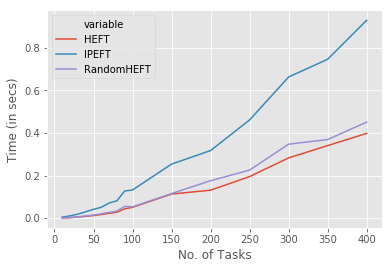

In [11]:
time = pd.melt(time, id_vars=['n']).sort_values(['variable','value'])
sns.lineplot(x="n", y='value',hue='variable', data=time)
plt.xlabel('No. of Tasks')
plt.ylabel('Time (in secs)')
# plt.savefig('time.png', dpi=300, format='png')